#Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


---


**About Dataset**\
1.Age: age of the patient in years\
2.Sex: sex of the patient


*   M: Male
*   F: Female

3.ChestPainType: chest pain type


*  TA: Typical Angina

*   ATA: Atypical Angina
*   NAP: Non-Anginal Pain


*   ASY: Asymptomatic
4.RestingBP: resting blood pressure in mmHg\
5.Cholesterol: serum cholesterol in mm/dl
6.FastingBS: fasting blood sugar


*   1: if FastingBS > 120 mg/dl, 0: otherwise
7.RestingECG: resting electrocardiogram results


*   Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]\
9.ExerciseAngina: exercise-induced angina

*   Y: Yes,N: No
10.Oldpeak: oldpeak = ST Numeric value measured in depression\
11.ST_Slope: the slope of the peak exercise ST segment

*   Up: upsloping


*   Flat: flat
*   Down: downsloping
12.HeartDisease: output class


*   1: heart disease
*   0: Normal


---





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="[LightGBM]")



In [ ]:
df=pd.read_csv('heart.csv')
# "pd" takma adıyla içe aktarılan Pandas kütüphanesini kullanarak bir CSV dosyasını oku ve veri çerçevesine dönüştür


In [ ]:
df.head()
# Oluşturulan veri çerçevesinin ilk birkaç satırını göstermek için "head()" fonksiyonunu kullan


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.rename(columns={'HeartDisease':'HeartFailure'},inplace=True)
# Veri çerçevesindeki 'HeartDisease' adlı sütunun adını 'HeartFailure' olarak değiştir


In [ ]:
df_bk=df.copy()
# Mevcut veri çerçevesinin bir kopyasını, sonradan predictionda kullanmak için oluşturdum


In [ ]:
df.shape
# Veri çerçevesinin boyutunu (satır ve sütun sayısı) görüntüle


(918, 12)

In [ ]:
df.info()
# Veri çerçevesinin genel bilgilerini görüntüle


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartFailure    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()
# Her sütundaki eksik (null) değer sayısını bul


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartFailure      0
dtype: int64

In [ ]:
df.describe().T
# Veri çerçevesinin sayısal sütunları için temel istatistiksel bilgileri görüntüle ve sonuçları transpoze et


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartFailure,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
df.corr()
# Veri çerçevesindeki sayısal sütunlar arasındaki korelasyon matrisini hesapla


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartFailure
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartFailure,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


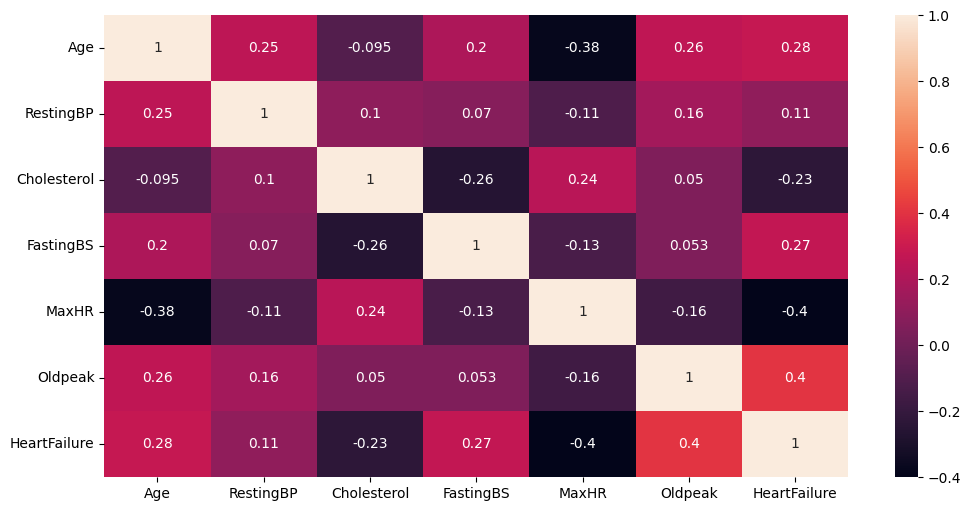

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True);
# Seaborn kütüphanesini kullanarak, sayısal sütunlar arasındaki korelasyon matrisini ısı haritası olarak görselleştir


In [ ]:
df[df['HeartFailure']==1].Sex.value_counts()
# 'HeartFailure' sütunu değeri 1 olan örnekler içinde cinsiyet (Sex) sütununun değerlerini say


M    458
F     50
Name: Sex, dtype: int64

In [ ]:
px.pie(df,values='HeartFailure',names='Sex',color='Sex',color_discrete_map={'F':'red','M':'blue'},template='plotly_dark',title='Gender differences in HeartFailure')
# Cinsiyet sütununa göre kalp başarısızlığı dağılımını pasta grafiği olarak görselleştir


Effect of Blood Pressure on Age

In [ ]:
px.scatter(df,x='Age',y='RestingBP',color='Sex',size='RestingBP',labels={'RestingBP':'BloodPressure'},template='plotly_dark',opacity=1,color_discrete_sequence=px.colors.sequential.RdBu,title='Age Vs BloodPressure')
# Yaşa göre dinlenme kan basıncını cinsiyete göre renklendirilmiş ve kan basıncı büyüklüğüne göre boyutlandırılmış bir saçılma grafiği oluştur


Effect of Heart Rate on Age

In [ ]:
px.scatter(df,x='Age',y='MaxHR',color='Sex',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate','Sex':'sex'},template='plotly_dark',opacity=0.8,color_discrete_map={'F':'orange','M':'red'},title='Age Vs HeartRate')
# Yaşa göre maksimum kalp atış hızını (MaxHR) cinsiyete göre renklendirilmiş ve kalp atış hızı büyüklüğüne göre boyutlandırılmış bir saçılma grafiği oluştur


BloodPressure Versus HeartRate

In [ ]:
px.scatter(df,x='RestingBP',y='MaxHR',color='Sex',size='MaxHR',labels={'RestingBP':'BloodPressure','MaxHR':'HeartRate'},template='plotly_dark',opacity=0.8,color_discrete_sequence=px.colors.sequential.RdBu,title='BloodPressure Vs HeartRate')
# Dinlenme kan basıncına (RestingBP) göre maksimum kalp atış hızını (MaxHR) cinsiyete göre renklendirilmiş ve kalp atış hızı büyüklüğüne göre boyutlandırılmış bir saçılma grafiği oluştur


In [ ]:
#df[df.RestingBP == 0]

In [ ]:
#df.loc[449, "RestingBP"] = df['RestingBP'].mean()

In [ ]:
#df.iloc[449]

Chest Pain Types \
-TA   : Typical Angina \
-ATA  : Atypical Angina   
-NAP  : Non-Anginal Pain \
-ASY  : Asymptomatic

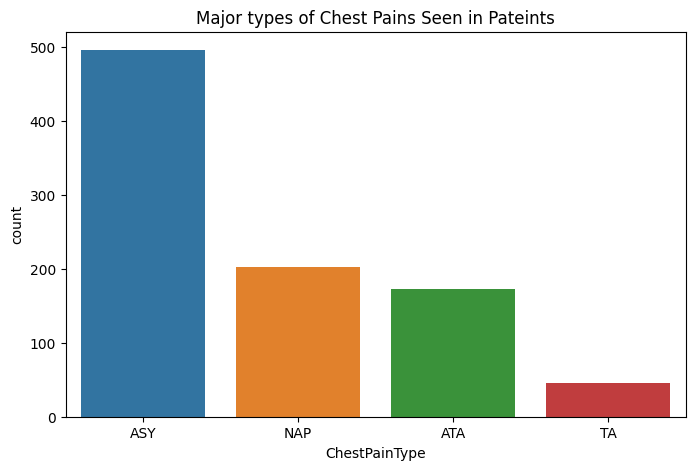

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='ChestPainType', data=df, order=df['ChestPainType'].value_counts().index)
plt.title('Major types of Chest Pains Seen in Pateints')
plt.show()
# Göğüs Ağrısı Türlerine göre hastalardaki göğüs ağrısı türlerinin sayısını içeren bir sütun grafiği oluştur


In [ ]:
px.violin(df,x='ChestPainType',y='MaxHR',color='ChestPainType',labels={'MaxHR':'HeartRate'},template='plotly_dark',title='ChestPainType Vs HeartRate')
# 'ChestPainType' sütununa göre kalp atış hızını (HeartRate) gösteren bir violin grafiği oluştur


In [ ]:
px.scatter(df,x='Age',y='MaxHR',color='ChestPainType',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate'},template='plotly_dark',opacity=1,color_discrete_sequence=px.colors.sequential.Plasma,title='ChestPainType Vs HeartRate')
# 'ChestPainType' sütununa göre renklendirilmiş ve 'MaxHR' değişkenine göre boyutlandırılmış bir saçılma grafiği oluştur


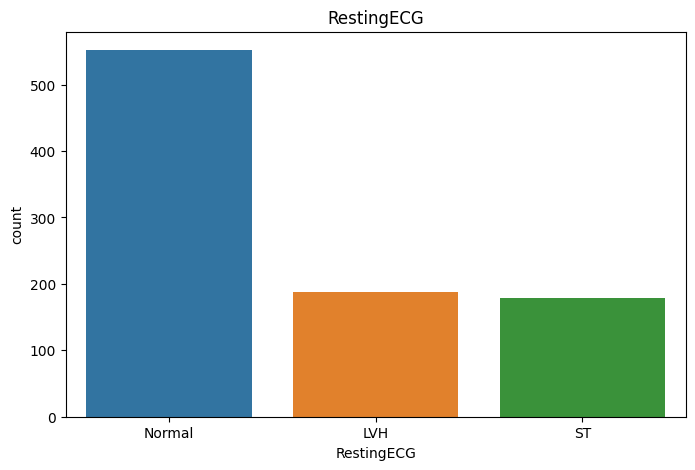

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RestingECG', data=df, order=df['RestingECG'].value_counts().index)
plt.title('RestingECG')
plt.show()
# 'RestingECG' sütununa göre sayısal bir sütun grafiği oluştur


In [ ]:
px.violin(df,x='RestingECG',y='MaxHR',color='RestingECG',labels={'MaxHR':'HeartRate'},template='plotly_dark',title='RestingECG Vs HeartRate')
# 'RestingECG' sütununa göre kalp atış hızını (HeartRate) gösteren bir violin grafiği oluştur


In [ ]:
px.scatter(df,x='Age',y='MaxHR',color='RestingECG',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate'},template='plotly_dark',opacity=1,color_discrete_sequence=px.colors.sequential.RdBu,title='RestingECG Vs HeartRate')
# 'Age' ve 'MaxHR' değişkenlerini kullanarak 'RestingECG' sütununa göre renklendirilmiş ve 'MaxHR' değişkenine göre boyutlandırılmış bir saçılma grafiği oluştur


ST_Slope: The slope of the peak exercise ST segment


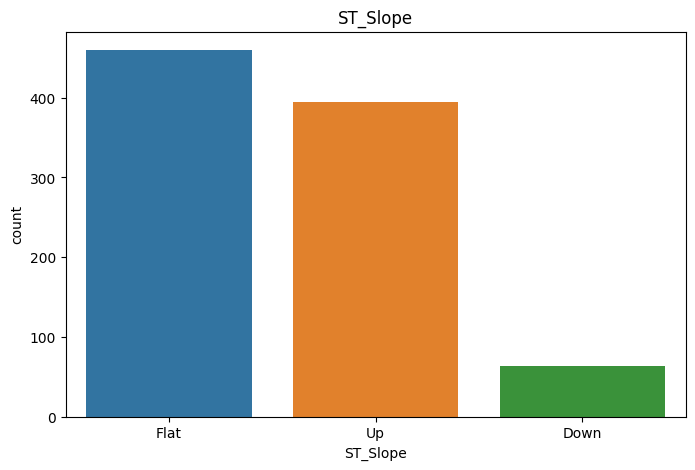

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='ST_Slope', data=df, order=df['ST_Slope'].value_counts().index)
plt.title('ST_Slope')
plt.show()
# 'ST_Slope' sütununa göre sayısal bir sütun grafiği oluştur


In [ ]:
px.violin(df,x='ST_Slope',y='MaxHR',color='ST_Slope',labels={'MaxHR':'HeartRate'},template='plotly_dark',title='ST_Slope Vs HeartRate')
# 'ST_Slope' sütununa göre kalp atış hızını (HeartRate) gösteren bir violin grafiği oluştur


In [ ]:
px.scatter(df,x='RestingBP',y='MaxHR',color='ST_Slope',size='MaxHR',template='plotly_dark',labels={'RestingBP':'BloodPressure','MaxHR':'HeartRate'},opacity=0.9,color_discrete_sequence=px.colors.sequential.RdBu,title='ST_Slope Vs HeartRate')
# "RestingBP" ve "MaxHR" değişkenlerini kullanarak "ST_Slope" sütununa göre renklendirilmiş ve "MaxHR" değişkenine göre boyutlandırılmış bir saçılma grafiği oluştur


In [ ]:
px.violin(df,x='HeartFailure',y='MaxHR',color='HeartFailure',labels={'MaxHR':'HeartRate'},template='plotly_dark',title='HeartFailure Vs HeartRate')
# "MaxHR" değişkenini "HeartFailure" sütununa göre renklendirilmiş ve violin grafiği ile gösteren bir grafik oluştur


In [ ]:
px.scatter(df,x='Oldpeak',y='Age',color='HeartFailure',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate'},template='plotly_dark',opacity=0.8,color_discrete_sequence=px.colors.sequential.RdBu,title='Oldpeak VS HeartFailure')
# "Oldpeak" ve "Age" değişkenlerini kullanarak "HeartFailure" sütununa göre renklendirilmiş ve "MaxHR" değişkenine göre boyutlandırılmış bir saçılma grafiği oluştur


In [ ]:
px.scatter(df,x='RestingBP',y='MaxHR',color='HeartFailure',size='MaxHR',template='plotly_dark',labels={'RestingBP':'BloodPressure','MaxHR':'HeartRate'},opacity=0.8,color_discrete_sequence=px.colors.sequential.RdBu,title='HeartRate and BloodPressure VS HeartFailure')
# "RestingBP" ve "MaxHR" değişkenlerini kullanarak "HeartFailure" sütununa göre renklendirilmiş ve "MaxHR" değişkenine göre boyutlandırılmış bir saçılma grafiği oluştur


In [ ]:
for col in df.columns:
    if df[col].dtype=='object':
        print("\n")
        print(col)
        print(df[col].unique())
        print(df[col].value_counts())
# Her bir kategorik (object) sütunun benzersiz değerlerini ve sayılarını yazdırma




Sex
['M' 'F']
M    725
F    193
Name: Sex, dtype: int64


ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


RestingECG
['Normal' 'ST' 'LVH']
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


ExerciseAngina
['N' 'Y']
N    547
Y    371
Name: ExerciseAngina, dtype: int64


ST_Slope
['Up' 'Flat' 'Down']
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

# Sütun içindeki kategorik değerleri sayısal formata dönüştür


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
x=df.drop('HeartFailure',axis=1)
# 'HeartFailure' sütununu çıkararak bağımsız değişkenleri oluştur
y=df['HeartFailure']

**Heart Failure Prediction**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
# Veri setini eğitim ve test setlerine ayır

((642, 11), (276, 11), (642,), (276,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
# Eğitim ve test serilerini 0-1 arasında daha optimal değerler almak için ölçeklendirdik

In [ ]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}
# Performans ölçütlerini depolamak için kullanılacak sözlük

In [ ]:
result=pd.DataFrame(a)
result
# Performans ölçütlerini Data Frame'e çevirdik

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[136  28]
 [ 11 101]]
Outcome values : 
 136 28 11 101
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.83      0.87       164
           0       0.78      0.90      0.84       112

    accuracy                           0.86       276
   macro avg       0.85      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276

Accuracy : 85.9 %
Precision : 92.5 %
Recall : 82.9 %
F1 Score : 0.875
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 86.5 %
MCC : MCC
roc_auc_score: 0.866


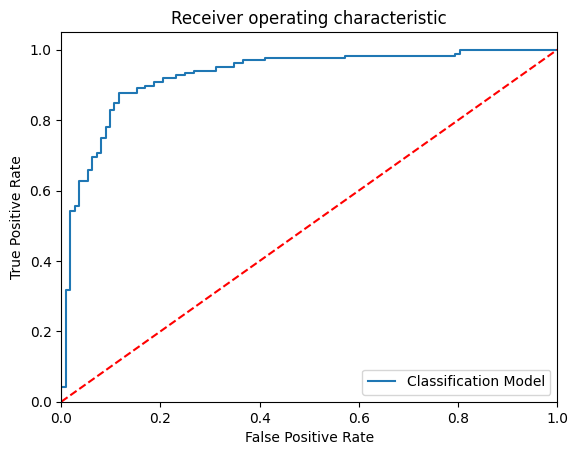

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[113  51]
 [ 34  78]]
Outcome values : 
 113 51 34 78
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.69      0.73       164
           0       0.60      0.70      0.65       112

    accuracy                           0.69       276
   macro avg       0.69      0.69      0.69       276
weighted avg       0.70      0.69      0.69       276

Accuracy : 69.2 %
Precision : 76.9 %
Recall : 68.9 %
F1 Score : 0.727
Specificity or True Negative Rate : 69.6 %
Balanced Accuracy : 69.2 %
MCC : MCC
roc_auc_score: 0.693


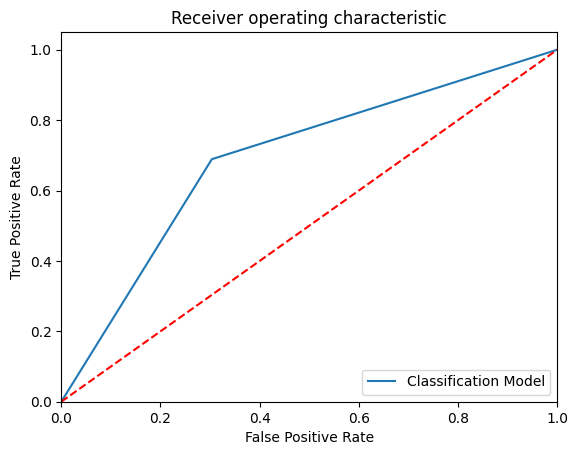

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[146  18]
 [ 14  98]]
Outcome values : 
 146 18 14 98
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.89      0.90       164
           0       0.84      0.88      0.86       112

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.88      0.88       276

Accuracy : 88.4 %
Precision : 91.2 %
Recall : 89.0 %
F1 Score : 0.901
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 88.3 %
MCC : MCC
roc_auc_score: 0.883


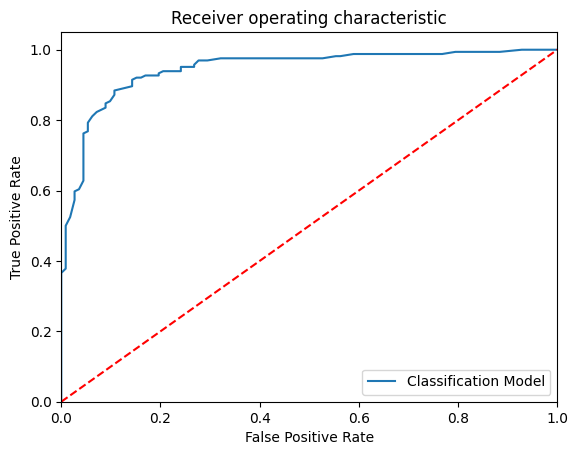

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[145  19]
 [ 10 102]]
Outcome values : 
 145 19 10 102
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.88      0.91       164
           0       0.84      0.91      0.88       112

    accuracy                           0.89       276
   macro avg       0.89      0.90      0.89       276
weighted avg       0.90      0.89      0.90       276

Accuracy : 89.5 %
Precision : 93.5 %
Recall : 88.4 %
F1 Score : 0.909
Specificity or True Negative Rate : 91.1 %
Balanced Accuracy : 89.8 %
MCC : MCC
roc_auc_score: 0.897


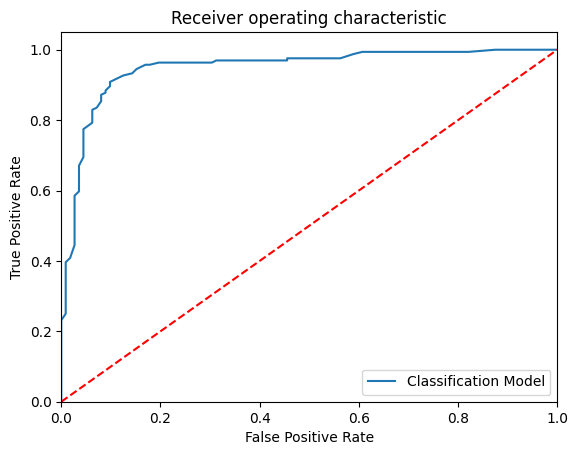

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[137  27]
 [ 13  99]]
Outcome values : 
 137 27 13 99
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.84      0.87       164
           0       0.79      0.88      0.83       112

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276

Accuracy : 85.5 %
Precision : 91.3 %
Recall : 83.5 %
F1 Score : 0.873
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 85.9 %
MCC : MCC
roc_auc_score: 0.86


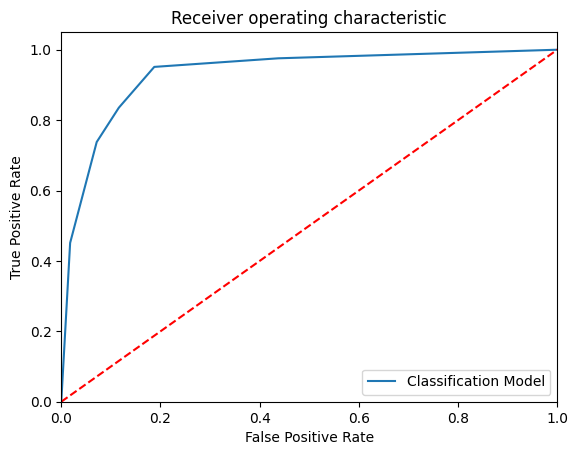

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[148  16]
 [ 15  97]]
Outcome values : 
 148 16 15 97
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.90      0.91       164
           0       0.86      0.87      0.86       112

    accuracy                           0.89       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.89      0.89       276

Accuracy : 88.8 %
Precision : 90.8 %
Recall : 90.2 %
F1 Score : 0.905
Specificity or True Negative Rate : 86.6 %
Balanced Accuracy : 88.4 %
MCC : MCC
roc_auc_score: 0.884


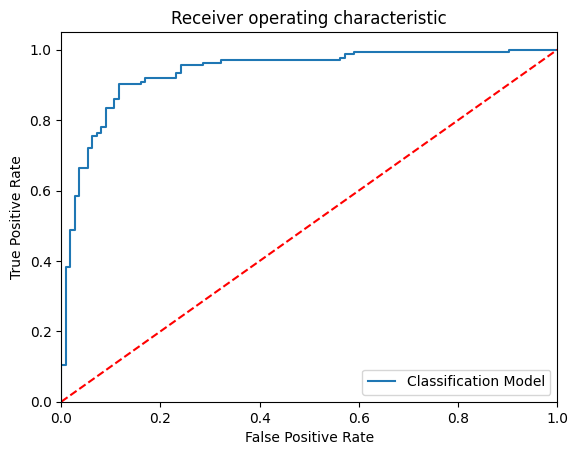

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(base_estimator=None, n_estimators=100)
Confusion matrix : 
 [[140  24]
 [ 21  91]]
Outcome values : 
 140 24 21 91
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.85      0.86       164
           0       0.79      0.81      0.80       112

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276

Accuracy : 83.7 %
Precision : 87.0 %
Recall : 85.4 %
F1 Score : 0.862
Specificity or True Negative Rate : 81.2 %
Balanced Accuracy : 83.3 %
MCC : MCC
roc_auc_score: 0.833


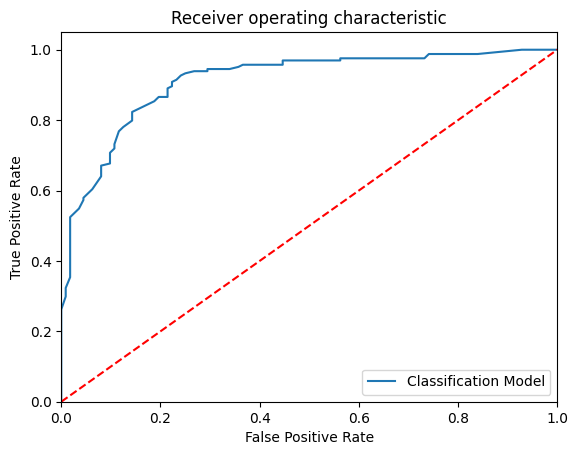

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[121  43]
 [  9 103]]
Outcome values : 
 121 43 9 103
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.74      0.82       164
           0       0.71      0.92      0.80       112

    accuracy                           0.81       276
   macro avg       0.82      0.83      0.81       276
weighted avg       0.84      0.81      0.81       276

Accuracy : 81.2 %
Precision : 93.1 %
Recall : 73.8 %
F1 Score : 0.823
Specificity or True Negative Rate : 92.0 %
Balanced Accuracy : 82.9 %
MCC : MCC
roc_auc_score: 0.829


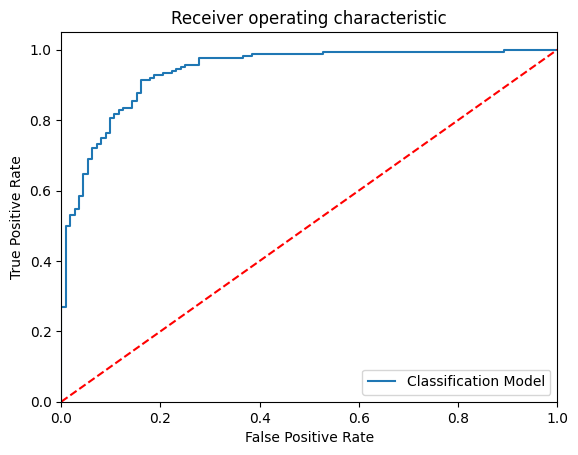

-----------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 344, number of negative: 298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535826 -> initscore=0.143548
[LightGBM] [Info] Start training from score 0.143548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

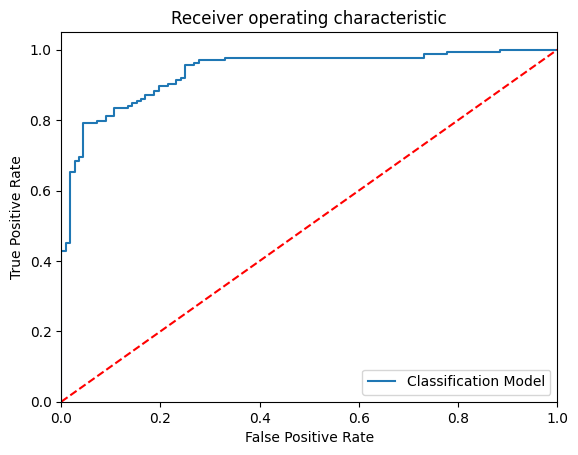

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[149  15]
 [ 25  87]]
Outcome values : 
 149 15 25 87
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.91      0.88       164
           0       0.85      0.78      0.81       112

    accuracy                           0.86       276
   macro avg       0.85      0.84      0.85       276
weighted avg       0.85      0.86      0.85       276

Accuracy : 85.5 %
Precision : 85.6 %
Recall : 90.9 %
F1 Score : 0.882
Specificity or True Negative Rate : 77.7 %
Balanced Accuracy : 84.3 %
MCC : MCC
roc_auc_score: 0.843


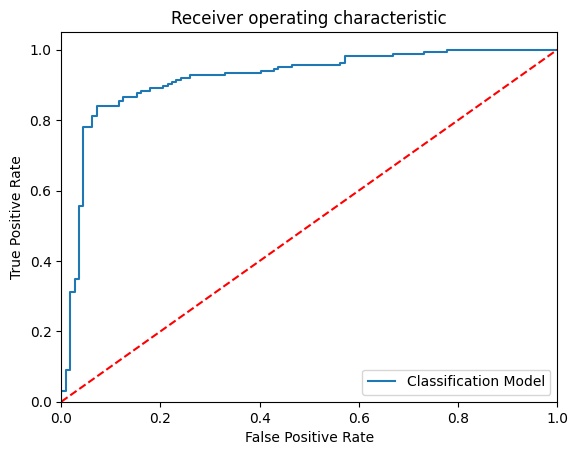

-----------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()


MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp,
               'False Negative' : fn,
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_row, ignore_index=True)

In [ ]:
top3=result.sort_values(by=['F1 Score','Accuracy','True Positive','True Negative'],ascending=False).reset_index(drop=True).head(3)
top3

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(ExtraTreeClassifier(random_state=1515940146),...",145.0,19.0,10.0,102.0,0.895,0.935,0.884,0.909,0.911,0.787,0.897430,0.898
1,SVC(probability=True),148.0,16.0,15.0,97.0,0.888,0.908,0.902,0.905,0.866,0.767,0.884255,0.884
2,"(DecisionTreeClassifier(max_features='sqrt', r...",146.0,18.0,14.0,98.0,0.884,0.912,0.890,0.901,0.875,0.761,0.882622,0.883


Extra Tree Classifier model performs best for this data with an Accuracy of 89%

In [ ]:
ModelET.fit(x_train,y_train)
y_pred=ModelET.predict(x_test)
# Extra Trees Classifier modelini eğit ve tahmin yaptır

In [ ]:
out={'HeartFailure_Actual':y_test,'HeartFailure_Pred':y_pred}
out=pd.DataFrame(out)

In [ ]:
df_bk=df_bk.merge(out,left_index=True,right_index=True)
df_bk.sample(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure,HeartFailure_Actual,HeartFailure_Pred
467,63,F,ATA,132,0,0,Normal,130,N,0.1,Up,0,0,0
789,34,M,TA,118,182,0,LVH,174,N,0.0,Up,0,0,0
881,44,M,ATA,120,263,0,Normal,173,N,0.0,Up,0,0,0
766,50,F,NAP,120,219,0,Normal,158,N,1.6,Flat,0,0,0
547,61,M,TA,142,200,1,ST,100,N,1.5,Down,1,1,1
652,59,M,TA,160,273,0,LVH,125,N,0.0,Up,1,1,0
584,64,M,ASY,141,244,1,ST,116,Y,1.5,Flat,1,1,1
444,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1,1,1
803,62,F,ASY,140,394,0,LVH,157,N,1.2,Flat,0,0,1
593,64,M,ASY,130,258,1,LVH,130,N,0.0,Flat,1,1,1
